## Exploratory Data Analysis 



### PANDAS
What we need to know about pandas?
* CSV: comma - separated values



In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns  # visualization tool
import matplotlib.patches as patches
%matplotlib inline

data = pd.read_csv('./data/pokemon.csv') # to load data as CSV

In [2]:
data.head() # to show the first top five

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [3]:
data.head(10)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
5,6,Charmeleon,Fire,NaN,58,64,58,80,65,80,1,False
6,7,Charizard,Fire,Flying,78,84,78,109,85,100,1,False
7,8,Mega Charizard X,Fire,Dragon,78,130,111,130,85,100,1,False
8,9,Mega Charizard Y,Fire,Flying,78,104,78,159,115,100,1,False
9,10,Squirtle,Water,NaN,44,48,65,50,64,43,1,False


In [4]:
data.tail() # لعرض اخر خمسة

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True
799,800,Volcanion,Fire,Water,80,110,120,130,90,70,6,True


In [5]:
# 1 - Filtering Pandas data frame
data[data['Defense']>200]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
224,225,Mega Steelix,Steel,Ground,75,125,230,55,95,30,2,False
230,231,Shuckle,Bug,Rock,20,10,230,10,230,5,2,False
333,334,Mega Aggron,Steel,NaN,70,140,230,60,80,50,3,False


In [6]:
import numpy as np
# 2 - Filtering pandas with logical_and and logical_or
data[np.logical_and(data['Defense']>200, data['Attack']>100 )]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
224,225,Mega Steelix,Steel,Ground,75,125,230,55,95,30,2,False
333,334,Mega Aggron,Steel,NaN,70,140,230,60,80,50,3,False


In [7]:
# This is also same with previous code line. Therefore we can also use '&' for filtering.
data[(data['Defense']>200) & (data['Attack']>100)]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
224,225,Mega Steelix,Steel,Ground,75,125,230,55,95,30,2,False
333,334,Mega Aggron,Steel,NaN,70,140,230,60,80,50,3,False


In [8]:
# For pandas we can achieve index and value
for index,value in data[['Attack']][0:1].iterrows():
    print(index," : ",value)

0  :  Attack    49
Name: 0, dtype: int64


In [9]:
# lets return pokemon csv and make one more list comprehension example
# lets classify pokemons whether they have high or low speed. Our threshold is average speed.
threshold = sum(data.Speed)/len(data.Speed)
data["speed_level"] = ["high" if i > threshold else "low" for i in data.Speed]
data.loc[:10,["speed_level","Speed"]] # we will learn loc more detailed later

,speed_level,Speed
0,low,45
1,low,60
2,high,80
3,high,80
4,low,65
5,high,80
6,high,100
7,high,100
8,high,100
9,low,43


# 3.CLEANING DATA

<a id="17"></a> <br>
### DIAGNOSE DATA for CLEANING
We need to diagnose and clean data before exploring.
<br>Unclean data:
* Column name inconsistency like upper-lower case letter or space between words
* missing data
* different language

<br> We will use head, tail, columns, shape and info methods to diagnose data



In [10]:
data.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,speed_level
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,low
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,low
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,high
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,high
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,low


In [11]:
data.tail()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,speed_level
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True,low
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True,high
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True,high
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True,high
799,800,Volcanion,Fire,Water,80,110,120,130,90,70,6,True,high


In [12]:
# columns gives column names of features
data.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Generation', 'Legendary', 'speed_level'],
      dtype='object')

In [13]:
# shape gives number of rows and columns in a tuble
data.shape

(800, 13)

In [14]:
# info gives data type like dataframe, number of sample or row, number of feature or column, feature types and memory usage
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
#              800 non-null int64
Name           799 non-null object
Type 1         800 non-null object
Type 2         414 non-null object
HP             800 non-null int64
Attack         800 non-null int64
Defense        800 non-null int64
Sp. Atk        800 non-null int64
Sp. Def        800 non-null int64
Speed          800 non-null int64
Generation     800 non-null int64
Legendary      800 non-null bool
speed_level    800 non-null object
dtypes: bool(1), int64(8), object(4)
memory usage: 75.9+ KB


<a id="18"></a> <br>
### EXPLORATORY DATA ANALYSIS
value_counts(): Frequency counts
<br>outliers: the value that is considerably higher or lower from rest of the data
* Lets say value at 75% is Q3 and value at 25% is Q1. 
* Outlier are smaller than Q1 - 1.5(Q3-Q1) and bigger than Q3 + 1.5(Q3-Q1). (Q3-Q1) = IQR
<br>We will use describe() method. Describe method includes:
* count: number of entries
* mean: average of entries
* std: standart deviation
* min: minimum entry
* 25%: first quantile
* 50%: median or second quantile
* 75%: third quantile
* max: maximum entry

<br> What is quantile?

* 1,4,5,6,8,9,11,12,13,14,15,16,17
* The median is the number that is in **middle** of the sequence. In this case it would be 11.

* The lower quartile is the median in between the smallest number and the median i.e. in between 1 and 11, which is 6.
* The upper quartile, you find the median between the median and the largest number i.e. between 11 and 17, which will be 14 according to the question above.

In [15]:
# For example lets look frequency of pokemom types
print(data['Type 1'].value_counts(dropna =False))  # if there are nan values that also be counted
# As it can be seen below there are 112 water pokemon or 70 grass pokemon

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Rock         44
Electric     44
Dragon       32
Ground       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64


In [16]:
# For example max HP is 255 or min defense is 5
data.describe() #ignore null entries

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,400.5000,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,231.0844,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.0000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,200.7500,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,400.5000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,600.2500,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,800.0000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


<a id="19"></a> <br>
### VISUAL EXPLORATORY DATA ANALYSIS
* Box plots: visualize basic statistics like outliers, min/max or quantiles

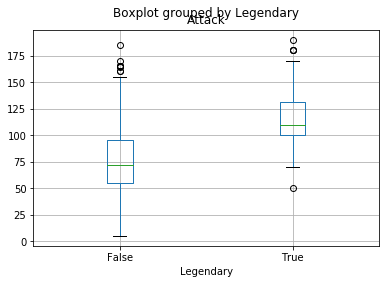

In [17]:
# For example: compare attack of pokemons that are legendary  or not
# Black line at top is max
# Blue line at top is 75%
# Red line is median (50%)
# Blue line at bottom is 25%
# Black line at bottom is min
# There are no outliers
data.boxplot(column='Attack',by = 'Legendary');

### MATPLOTLIB
Matplot is a python library that help us to plot data. The easiest and basic plots are line, scatter and histogram plots.
* Line plot is better when x axis is time.
* Scatter is better when there is correlation between two variables
* Histogram is better when we need to see distribution of numerical data.
* Customization: Colors,labels,thickness of line, title, opacity, grid, figsize, ticks of axis and linestyle  

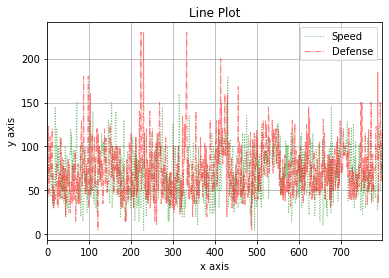

In [18]:
# Line Plot
# color = color, label = label, linewidth = width of line, alpha = opacity, grid = grid, linestyle = sytle of line
data.Speed.plot(kind = 'line', color = 'g',label = 'Speed',linewidth=1,alpha = 0.5,grid = True,linestyle = ':')
data.Defense.plot(color = 'r',label = 'Defense',linewidth=1, alpha = 0.5,grid = True,linestyle = '-.')
plt.legend(loc='upper right')     # legend = puts label into plot
plt.xlabel('x axis')              # label = name of label
plt.ylabel('y axis')
plt.title('Line Plot')            # title = title of plot
plt.show()

Text(0.5, 1.0, 'Attack Defense Scatter Plot')

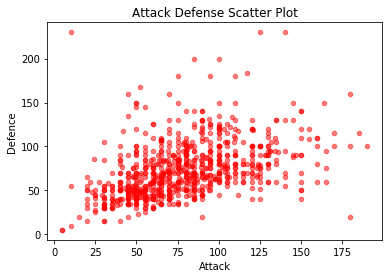

In [19]:
# Scatter Plot 
# x = attack, y = defense
data.plot(kind='scatter', x='Attack', y='Defense',alpha = 0.5,color = 'red')
plt.xlabel('Attack')              # label = name of label
plt.ylabel('Defence')
plt.title('Attack Defense Scatter Plot')            # title = title of plot

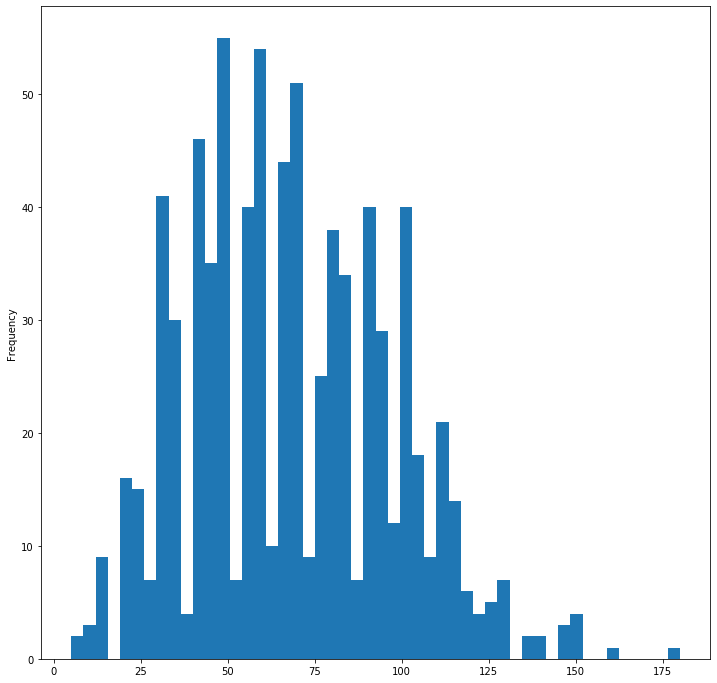

In [20]:
# Histogram
# bins = number of bar in figure
data.Speed.plot(kind = 'hist',bins = 50,figsize = (12,12))
plt.show()

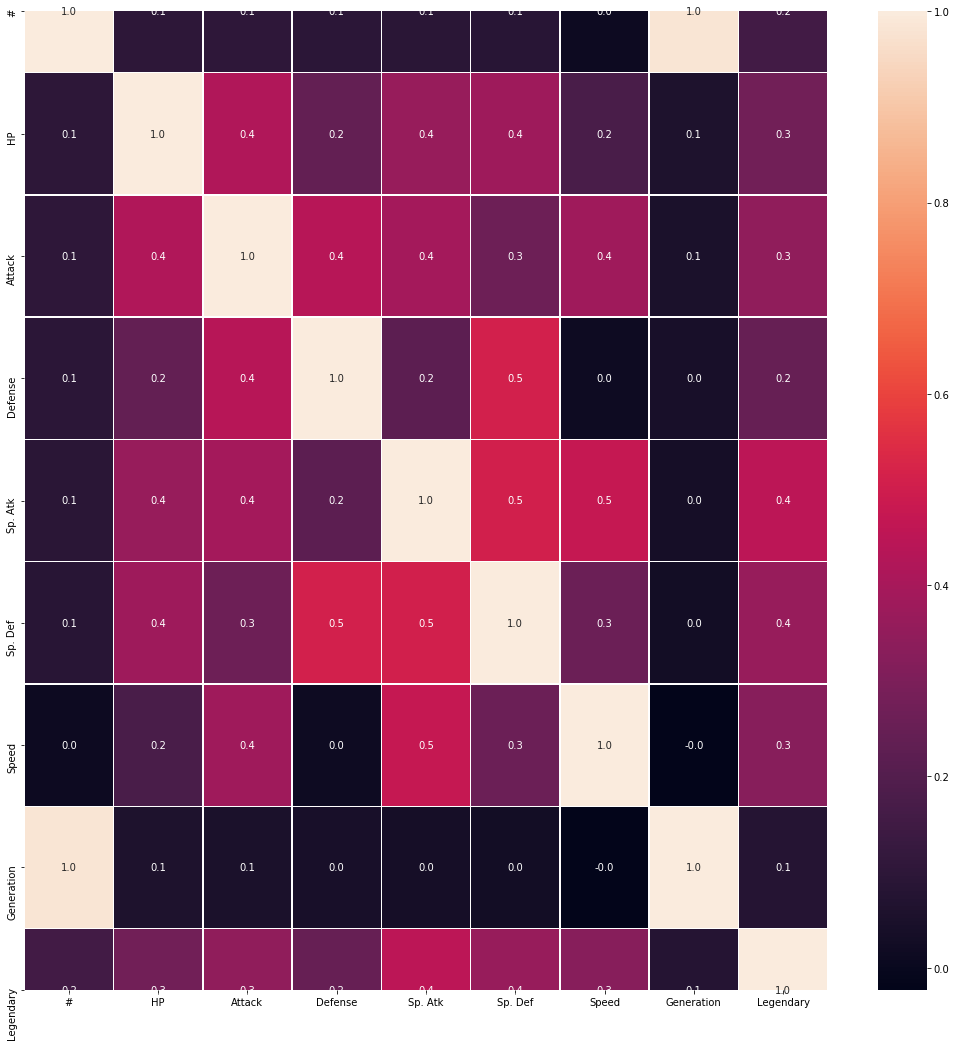

In [21]:
#correlation map or heat map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

* Plot
* Subplot
* Histogram:
    * bins: number of bins
    * range(tuble): min and max values of bins
    * normed(boolean): normalize or not
    * cumulative(boolean): compute cumulative distribution

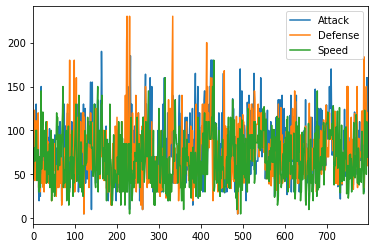

In [22]:
# Plotting all data 
data1 = data.loc[:,["Attack","Defense","Speed"]]
data1.plot()
# it is confusing

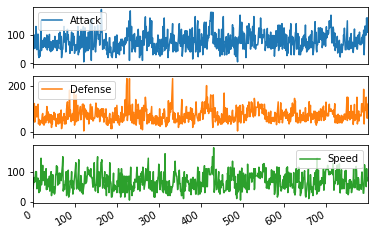

In [23]:
# subplots
data1.plot(subplots = True)
plt.show()

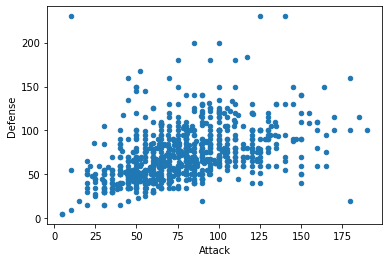

In [24]:
# scatter plot  
data1.plot(kind = "scatter",x="Attack",y = "Defense")
plt.show()

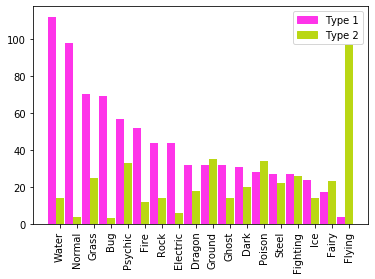

In [25]:
vals1 = [data['Type 1'].value_counts()[key] for key in data['Type 1'].value_counts().index]
vals2 = [data['Type 2'].value_counts()[key] for key in data['Type 1'].value_counts().index]
inds = np.arange(len(data['Type 1'].value_counts().index))
width = .45
color1 = np.random.rand(3)
color2 = np.random.rand(3)
handles = [patches.Patch(color=color1, label='Type 1'), patches.Patch(color=color2, label='Type 2')]
plt.bar(inds, vals1, width, color=color1)
plt.bar(inds+width, vals2, width, color=color2)
plt.gca().set_xticklabels(data['Type 1'].value_counts().index)
plt.gca().set_xticks(inds+width)
plt.xticks(rotation=90)
plt.legend(handles=handles)

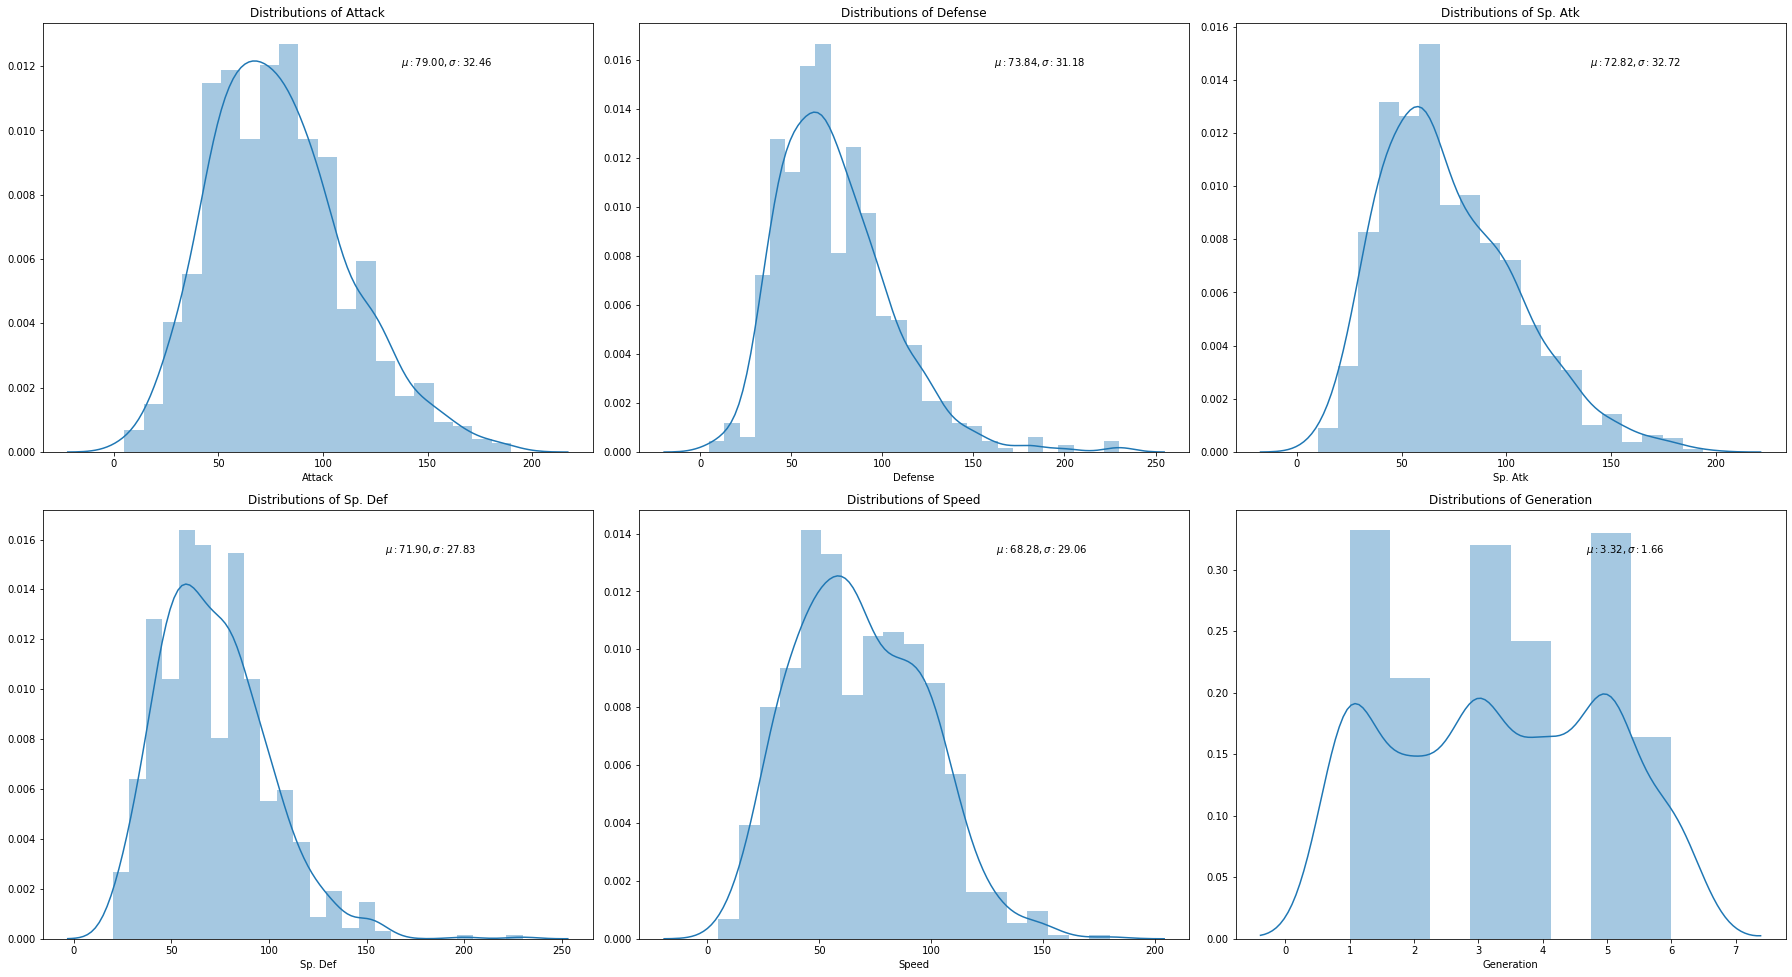

In [26]:
stats = data.columns[5:11]
plt.figure(figsize=(25, 20))

for ii, stat in enumerate(stats):
    title = "Distributions of {stat}".format(
        stat = stat
    )
    plt.subplot(3, 3, ii+1)
    plt.title(title)
    sns.distplot(data[stat])
    x = plt.gca().get_xlim()[1] * .6
    y = plt.gca().get_ylim()[1] * .9
    plt.text(x, y, '$\mu: {mu: .2f}, \sigma: {sigma: .2f}$'.format(mu = data[stat].mean(), sigma=data[stat].std()))
    
    
plt.tight_layout()
plt.show()

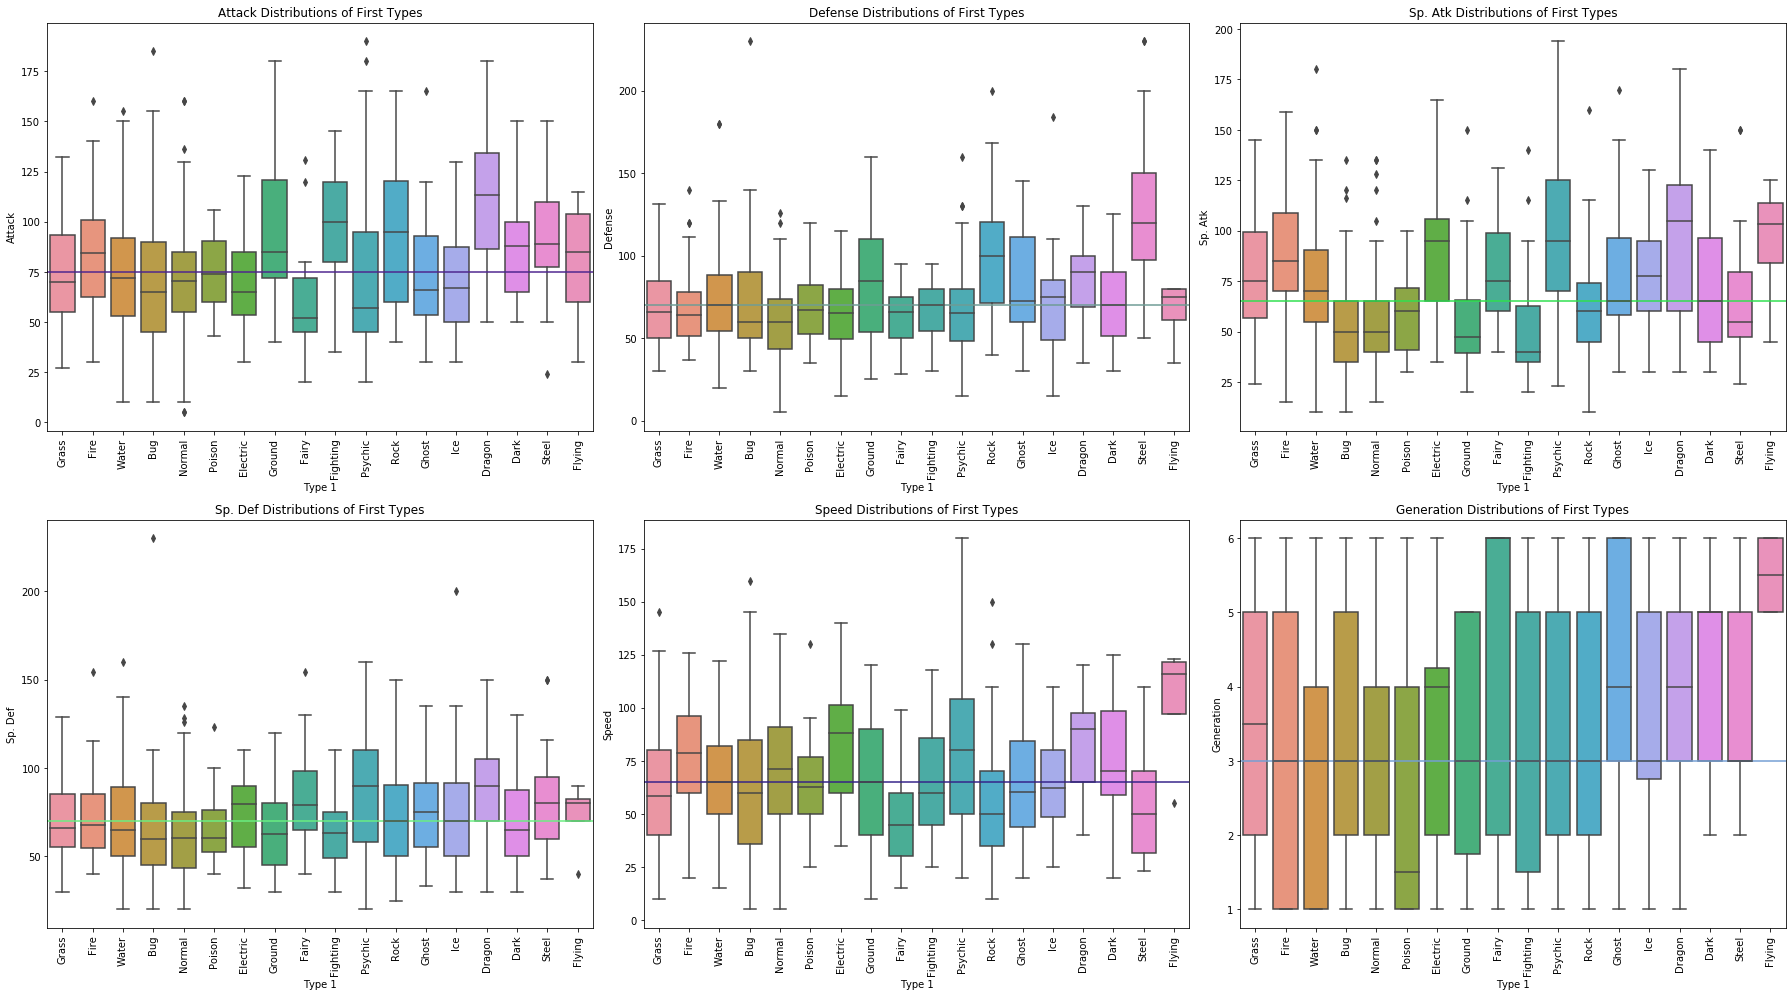

In [27]:
plt.figure(figsize=(25,20))

for ii, stat in enumerate(stats):
    title = "{stat} Distributions of First Types".format(
        stat = stat
    )
    plt.subplot(3, 3, ii+1)
    plt.title(title)
    plt.xticks(rotation=90)
    sns.boxplot(x='Type 1', y=stat, data = data)
    plt.axhline(data[stat].median(), color=np.random.rand(3))
    
plt.tight_layout()
plt.show()

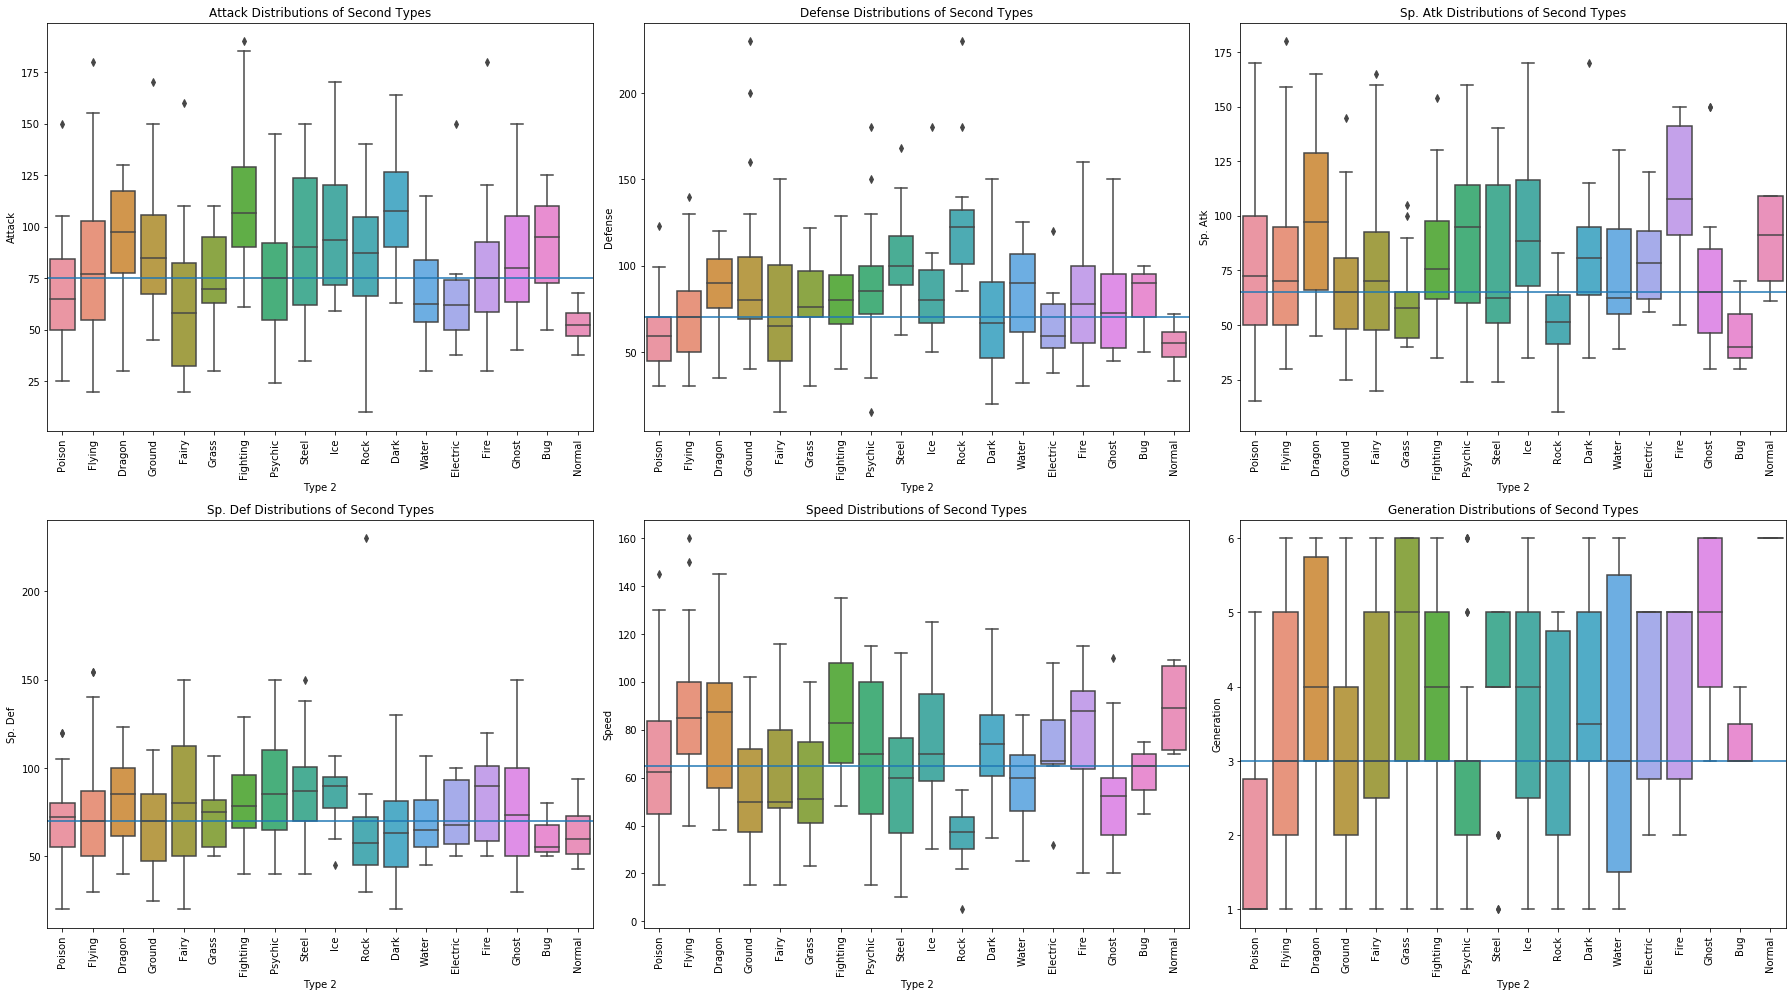

In [28]:
plt.figure(figsize=(25,20))
for ii, stat in enumerate(stats):
    title = "{stat} Distributions of Second Types".format(
        stat = stat
    )
    plt.subplot(3, 3, ii+1)
    plt.title(title)
    plt.xticks(rotation=90)
    sns.boxplot(x='Type 2', y=stat, data = data)
    plt.axhline(data[stat].median())
    
plt.tight_layout()
plt.show()

In [29]:
# Firstly I create new data from pokemons data to explain melt nore easily.
data_new = data.head()    # I only take 5 rows into new data
data_new

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,speed_level
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,low
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,low
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,high
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,high
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,low


In [30]:
# lets melt
# id_vars = what we do not wish to melt
# value_vars = what we want to melt
melted = pd.melt(frame=data_new,id_vars = 'Name', value_vars= ['Attack','Defense'])
melted

,Name,variable,value
0,Bulbasaur,Attack,49
1,Ivysaur,Attack,62
2,Venusaur,Attack,82
3,Mega Venusaur,Attack,100
4,Charmander,Attack,52
5,Bulbasaur,Defense,49
6,Ivysaur,Defense,63
7,Venusaur,Defense,83
8,Mega Venusaur,Defense,123
9,Charmander,Defense,43


### PIVOTING DATA
Reverse of melting.

In [31]:
# Index is name
# I want to make that columns are variable
# Finally values in columns are value
melted.pivot(index = 'Name', columns = 'variable',values='value')

variable,Attack,Defense
Name,,
Bulbasaur,49,49
Charmander,52,43
Ivysaur,62,63
Mega Venusaur,100,123
Venusaur,82,83


In [32]:
# Defining column using other columns
data["total_power"] = data.Attack + data.Defense
data.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,speed_level,total_power
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,low,98
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,low,125
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,high,165
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,high,223
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,low,95
